Now 0.64% (459/71280) MIN:0.014910


<AxesSubplot:xlabel='dt'>

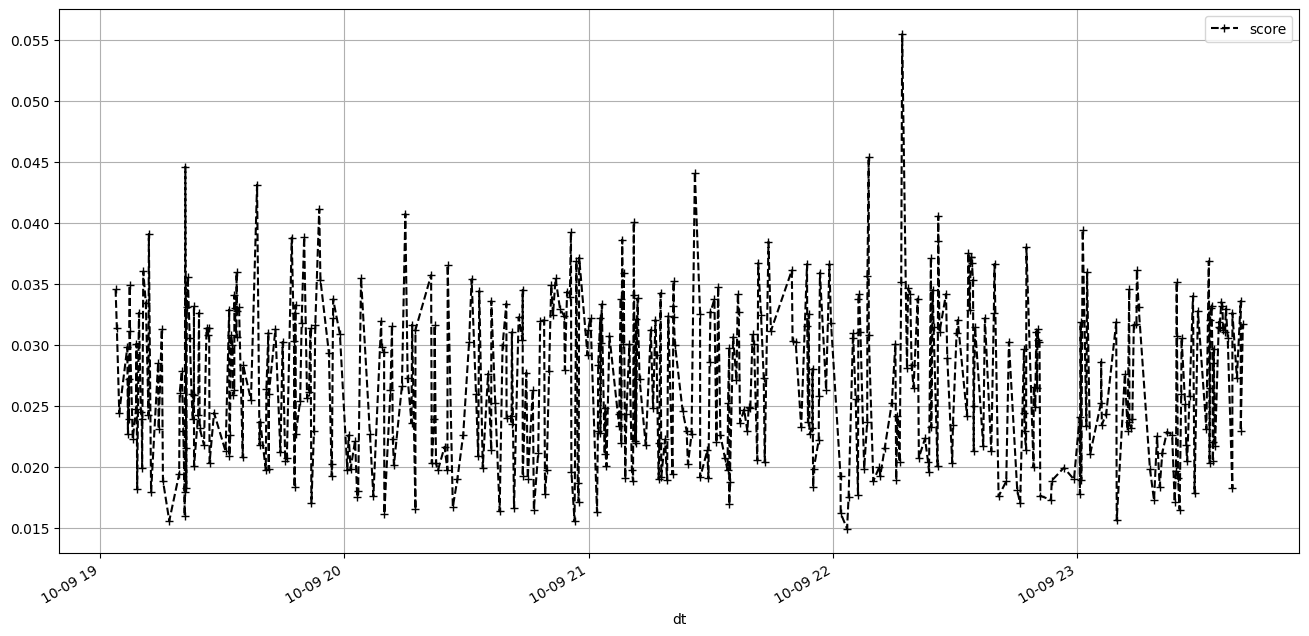

In [210]:
import os
import time
import pandas as pd

get_time = lambda f: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(os.path.getctime(f)))

cpara = 0
for para1 in range(1, 12, 1):
        for para2 in [1, 2, 3]:
            for para3 in range(100, 1000, 100):
                for para4 in [10, 20, 50, 100]:
                    for para5 in [8, 16, 32, 64, 128]:
                        for para6 in ["SimpleRNN", "LSTM", "GRU"]:
                            for _ in range(4):
                                cpara += 1
task = pd.DataFrame([
    [get_time(f"./save/{i}"), float(i.replace("result-","").replace(".csv",""))] 
    for i in os.listdir("./save") 
    if i.endswith(".csv")
], columns=["dt", "score"])
print(f"""Now {len(task)/cpara:.2%} ({len(task)}/{cpara}) MIN:{task["score"].min():.6f}""")
task["dt"] = pd.to_datetime(task["dt"])
# task = task[task["score"] < 0.045]

plot = task.plot(x=0, y=1, kind="line", figsize=(16,8), color='black', linestyle='--', marker='+')
plot.grid()
plot
